In [1]:
!pip install nba_api

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 1.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 1.2 MB/s eta 0:00:00a 0:00:01
Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0


In [9]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

nba_teams = teams.get_teams()
#print(type(nba_teams))
#print(len(nba_teams))
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()


,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [12]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
id_warriors=df_warriors[['id']].values[0][0]
id_warriors

1610612744

In [13]:
from nba_api.stats.endpoints import leaguegamefinder

In [15]:

gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)
gamefinder.get_json()
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,52023,1610612744,GSW,Golden State Warriors,0052300131,2024-04-16,GSW @ SAC,L,239,94,...,0.783,8.0,34.0,42.0,19,5,3,16,17,-24.0
1,22023,1610612744,GSW,Golden State Warriors,0022301198,2024-04-14,GSW vs. UTA,W,239,123,...,0.826,12.0,30.0,42.0,35,10,6,9,14,7.0
2,22023,1610612744,GSW,Golden State Warriors,0022301182,2024-04-12,GSW vs. NOP,L,240,109,...,0.762,11.0,42.0,53.0,27,6,5,16,15,-5.0
3,22023,1610612744,GSW,Golden State Warriors,0022301169,2024-04-11,GSW @ POR,W,240,100,...,0.800,10.0,36.0,46.0,24,8,13,16,18,8.0
4,22023,1610612744,GSW,Golden State Warriors,0022301155,2024-04-09,GSW @ LAL,W,241,134,...,0.667,4.0,38.0,42.0,37,3,12,15,17,14.0


In [16]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")


In [17]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


In [20]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']
print(games_home['PLUS_MINUS'].mean())
print(games_away['PLUS_MINUS'].mean())

3.730769230769231
-0.6071428571428571


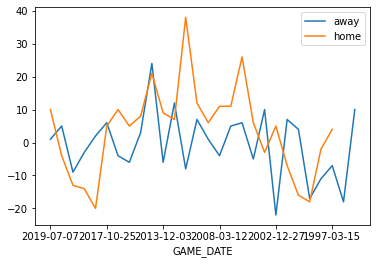

In [21]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()